In [49]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [50]:
data=pd.read_csv("train.csv")
submissions=pd.read_csv("sample_submission.csv")
test_data=pd.read_csv("test.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HighBP,HighChol,BMI,PhysActivity,HvyAlcoholConsump
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,40,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,25,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,28,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,27,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,24,1,0


In [51]:
def data_preprocess(data):

    data['group'] = data.apply(lambda row : row['PassengerId'][-1],axis=1)
    data['deck'] = data['Cabin'].str.split('/',expand=True)[0]
    data['side'] = data['Cabin'].str.split('/',expand=True)[2]
    data.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)
    object_features = data.columns[data.dtypes=='object']
    num_features = data.columns[data.dtypes!='object']
    for feature in object_features:
        data[feature].fillna(data[feature].mode()[0],inplace=True)
    imputer = KNNImputer(n_neighbors=5)
    data[num_features] = imputer.fit_transform(data[num_features])
    data['expend'] = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
    data['Age_band'] = pd.qcut(data['Age'],q=10,labels=range(10)).astype('float') 
    data['VIP'].replace({False:0,True:1},inplace=True)
    data['CryoSleep'].replace({False:0,True:1},inplace=True)
    new_object_features = data.columns[data.dtypes=='object']
    for feature in new_object_features:
        data = data.join(pd.get_dummies(data[feature]))
        data.drop([feature],axis=1,inplace=True)
    
    return data

DATA CLEANING AND SETTING

PLOTTING GRAPHS

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
#composition of expenses

In [54]:
import seaborn as sns

In [55]:
data.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HighBP,HighChol,BMI,PhysActivity,HvyAlcoholConsump
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,0.019207,0.001127,-0.006240,0.001957,0.003538
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,0.003698,-0.003901,0.016622,0.014425,-0.017878
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,-0.002113,-0.008213,-0.017449,0.001237,-0.011060
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,0.002936,-0.007022,0.005333,-0.002006,-0.004739
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,0.000554,-0.007641,-0.018894,-0.003334,-0.002697
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,-0.011911,0.009662,-0.014603,0.015326,0.019169
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,0.009955,0.017734,0.003279,-0.006708,-0.006293
HighBP,0.019207,0.003698,-0.002113,0.002936,0.000554,-0.011911,0.009955,1.000000,0.287801,0.234974,-0.128275,-0.005643
HighChol,0.001127,-0.003901,-0.008213,-0.007022,-0.007641,0.009662,0.017734,0.287801,1.000000,0.108960,-0.115641,-0.014607
BMI,-0.006240,0.016622,-0.017449,0.005333,-0.018894,-0.014603,0.003279,0.234974,0.108960,1.000000,-0.158104,-0.045333


<AxesSubplot:>

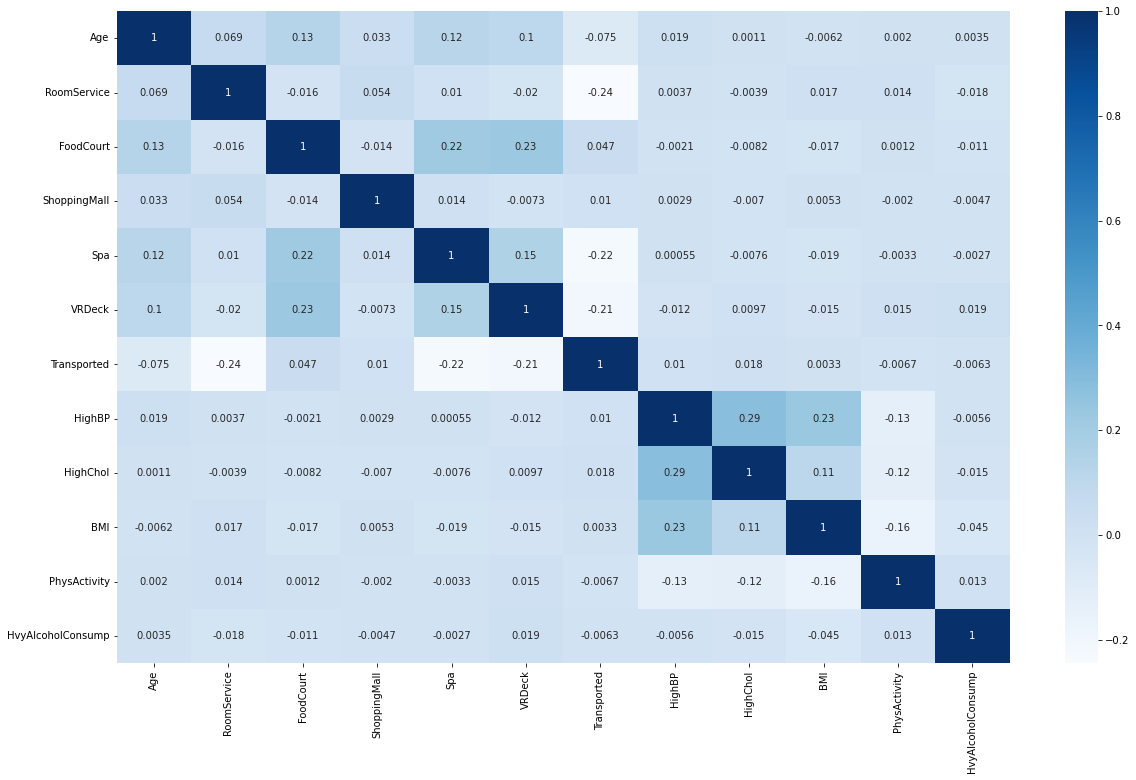

In [56]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

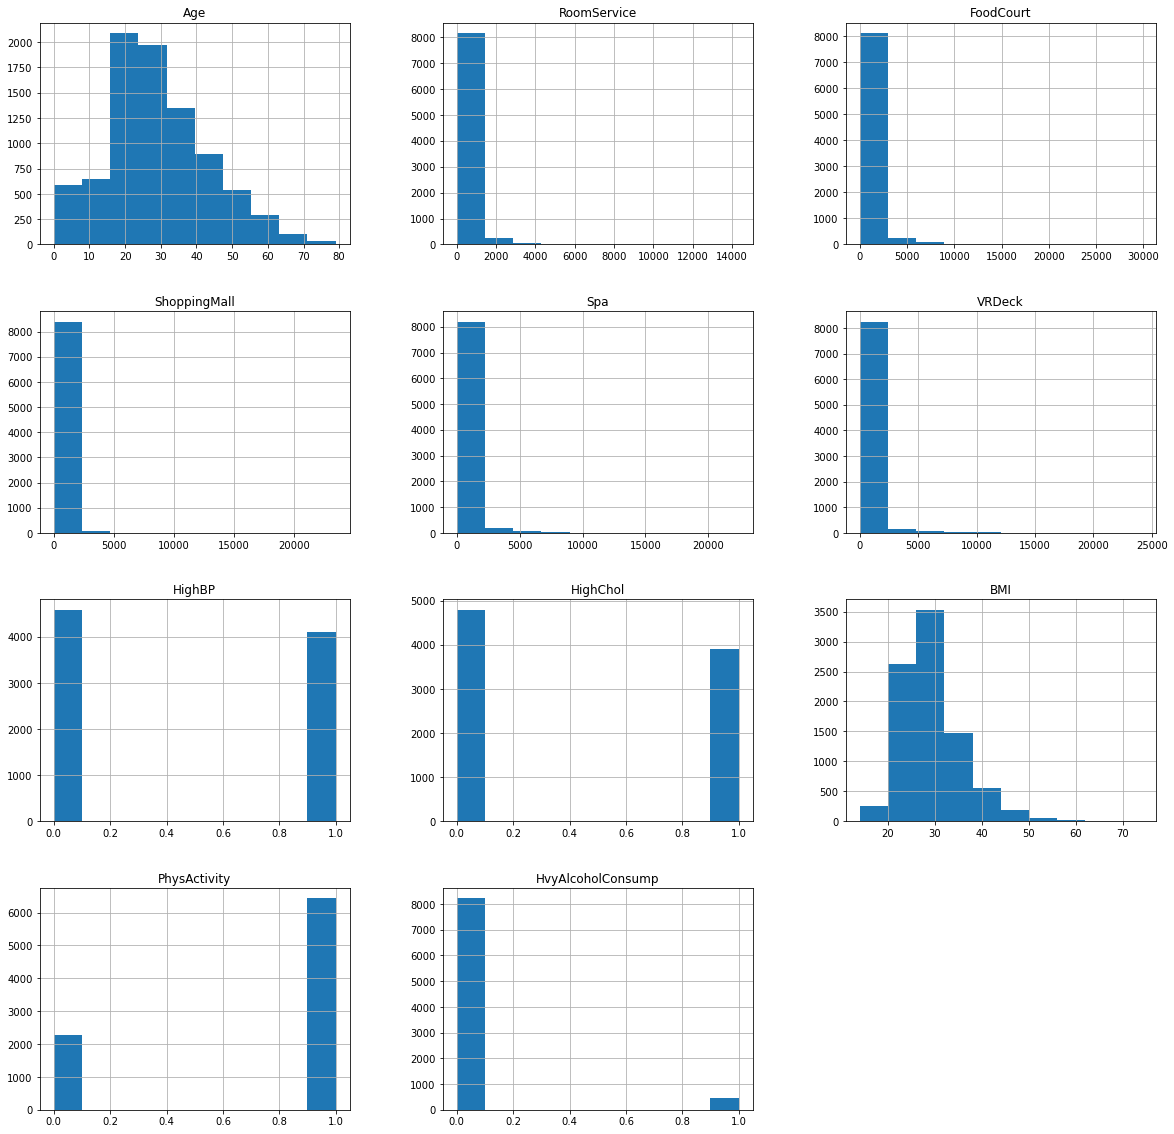

In [57]:
#we see the discrete columns and the continuous column age
data.hist(figsize=(20,20));

Text(0.5, 1.0, 'VIP composition')

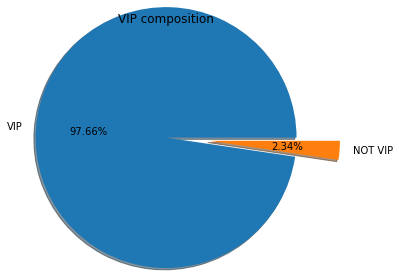

In [58]:
plt.pie(data["VIP"].value_counts(),labels=['VIP','NOT VIP'],radius=1.5,autopct = "%.2f%%",shadow=True,explode=(0,0.5));
plt.title("VIP composition")

Text(0.5, 1.0, 'Alcohol consumption')

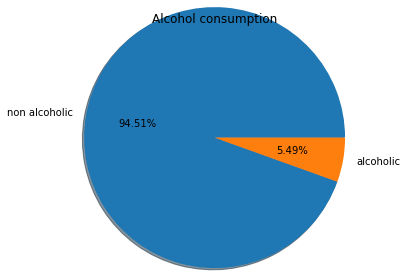

In [59]:
plt.pie(data["HvyAlcoholConsump"].value_counts(),labels=['non alcoholic','alcoholic'],radius=1.5,autopct = "%.2f%%",shadow=True);
plt.title("Alcohol consumption")

Text(0.5, 1.0, 'physical activity')

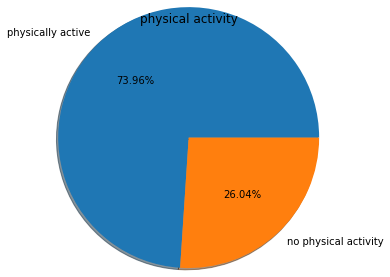

In [60]:
plt.pie(data["PhysActivity"].value_counts(),labels=['physically active','no physical activity'],radius=1.5,autopct = "%.2f%%",shadow=True);
plt.title("physical activity")

Text(0.5, 1.0, 'Cholestrol levels')

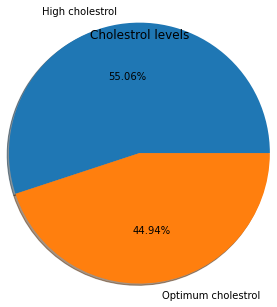

In [61]:
plt.pie(data["HighChol"].value_counts(),labels=['High cholestrol','Optimum cholestrol'],radius=1.5,autopct = "%.2f%%",shadow=True);
plt.title("Cholestrol levels")

Text(0.5, 1.0, 'BP levels')

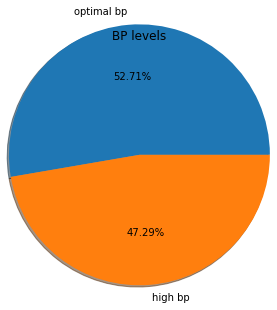

In [62]:
plt.pie(data["HighBP"].value_counts(),labels=['optimal bp','high bp'],radius=1.5,autopct = "%.2f%%",shadow=True);
plt.title("BP levels")

<AxesSubplot:xlabel='Transported', ylabel='count'>

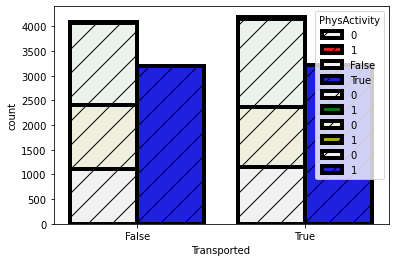

In [63]:
sns.countplot(x="Transported", data=data,hue="HighBP",lw=4,ec="black",hatch="/",color="r")
sns.countplot(x="Transported", data=data,hue="VIP",lw=4,ec="black",hatch="/",color="b")
sns.countplot(x="Transported", data=data,hue="HvyAlcoholConsump",lw=4,ec="black",hatch="/",color="g")
sns.countplot(x="Transported", data=data,hue="HighChol",lw=4,ec="black",hatch="/",color="y")
sns.countplot(x="Transported", data=data,hue="PhysActivity",lw=4,ec="black",hatch="/",color="b")

<AxesSubplot:xlabel='Transported', ylabel='count'>

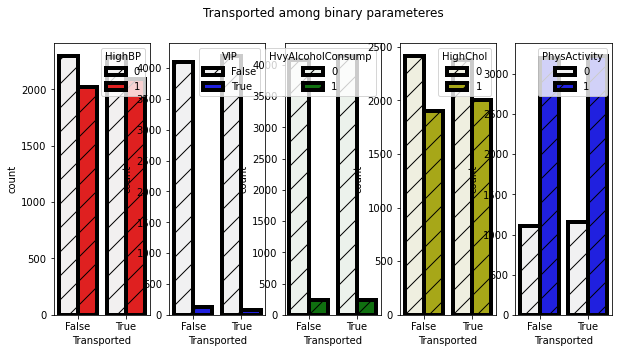

In [64]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
fig.suptitle('Transported among binary parameteres')
sns.countplot(ax=axes[0],x="Transported", data=data,hue="HighBP",lw=4,ec="black",hatch="/",color="r")
sns.countplot(ax=axes[1],x="Transported", data=data,hue="VIP",lw=4,ec="black",hatch="/",color="b")
sns.countplot(ax=axes[2],x="Transported", data=data,hue="HvyAlcoholConsump",lw=4,ec="black",hatch="/",color="g")
sns.countplot(ax=axes[3],x="Transported", data=data,hue="HighChol",lw=4,ec="black",hatch="/",color="y")
sns.countplot(ax=axes[4],x="Transported", data=data,hue="PhysActivity",lw=4,ec="black",hatch="/",color="b")

In [65]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HighBP,HighChol,BMI,PhysActivity,HvyAlcoholConsump
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,40,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,25,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,28,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,27,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,24,1,0


In [66]:

data=data_preprocess(data)
test_data=data_preprocess(test_data)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
# split data
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Transported'],axis=1),data['Transported'],test_size=0.3,random_state=1,stratify=data['Transported'])
# prepare for cross validation  
X, Y = data.drop(['Transported'],axis=1), data['Transported']

In [68]:
scores={}
predictions={}
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(max_depth=2500, min_samples_split=130,min_samples_leaf=8)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('accuracy : ',accuracy_score(y_test,pred))
scores['DecisionTreeClassifier']=accuracy_score(y_test,pred)*100
predictions['DecisionTreeClassifier']=model
report = classification_report(y_test, pred)
print(report)

accuracy :  0.781441717791411
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1295
         1.0       0.79      0.77      0.78      1313

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier()
model.fit(X_train,y_train.ravel())
pred = model.predict(X_test)
accuracy_score(y_test,pred)
print('accuracy : ',accuracy_score(y_test,pred))
scores['RandomForestClassifier']=accuracy_score(y_test,pred)*100
predictions['RandomForestClassifier']=model
report = classification_report(y_test, pred)
print(report)

accuracy :  0.7937116564417178
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      1295
         1.0       0.81      0.78      0.79      1313

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('accuracy : ',accuracy_score(y_test,pred))
scores['LogisticRegression']=accuracy_score(y_test,pred)*100
predictions['LogisticRegression']=model
report = classification_report(y_test, pred)
print(report)

accuracy :  0.7971625766871165
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      1295
         1.0       0.78      0.83      0.80      1313

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('accuracy : ',accuracy_score(y_test,pred))
scores['KNeighborsClassifier']=accuracy_score(y_test,pred)*100
predictions['KNeighborsClassifier']=pred
report = classification_report(y_test, pred)
print(report)

accuracy :  0.776457055214724
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      1295
         1.0       0.78      0.78      0.78      1313

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [72]:
scores

{'DecisionTreeClassifier': 78.1441717791411,
 'RandomForestClassifier': 79.37116564417178,
 'LogisticRegression': 79.71625766871165,
 'KNeighborsClassifier': 77.6457055214724}

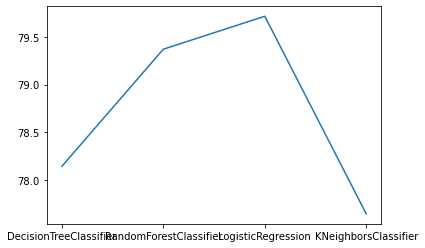

In [85]:
best_algorithm=''
ma=0
li=[]
al=[]
for i in scores:
    al.append(i)
    li.append(scores[i])
    if scores[i]>ma:
        ma=scores[i]
        best_algorithm=i
plt.plot(al,li)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LGmodel = LogisticRegression(C=0.025,max_iter=10000)
LGmodel.fit(X_train,y_train)
pred_ = LGmodel.predict(test_data)
submissions['Transported'] = pred_.astype(bool)
submissions.to_csv('submission.csv', index=False)
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      1295
         1.0       0.78      0.78      0.78      1313

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

